<a href="https://colab.research.google.com/github/nuwanisamarakoon/Calorie_Burn_Prediction_Model/blob/main/Calorie_Burn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calorie Burn Prediction**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
# Load the dataset
data = pd.read_csv('gym_members_exercise_tracking.csv')

Explore the dataset

In [ ]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
data.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


Sanity check of data

In [ ]:
#Shape
data.shape

(973, 15)

In [ ]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
#Finding missing values
data.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [ ]:
#Finding duplicates
data.duplicated().sum()

0

In [ ]:
#Identifying garbege values
for i in data.select_dtypes(include="object").columns:
  print(data[i].value_counts())
  print("*"*10)

Gender
Male      511
Female    462
Name: count, dtype: int64
**********
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
**********


Exploratory Data Analysis(EDA)

In [ ]:
#Descriptive statistics
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
data.describe(include="object")

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


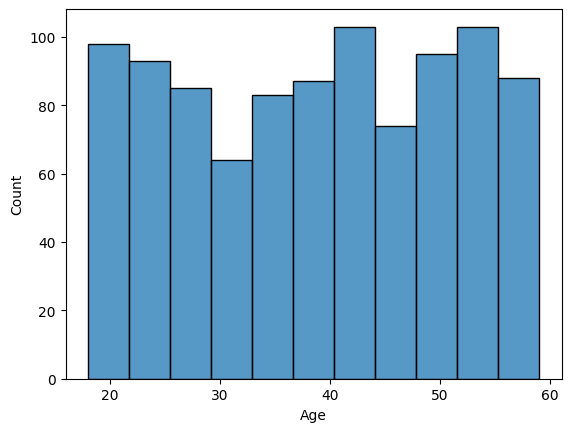

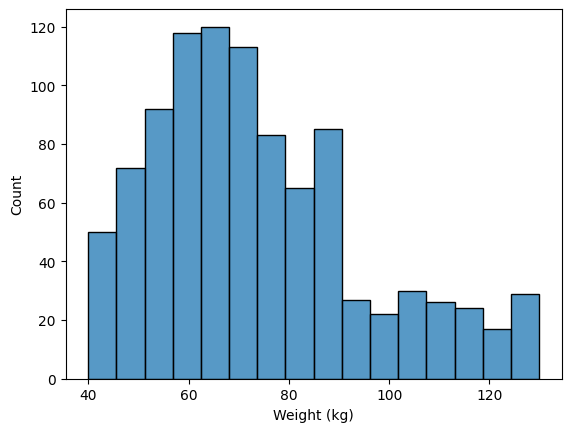

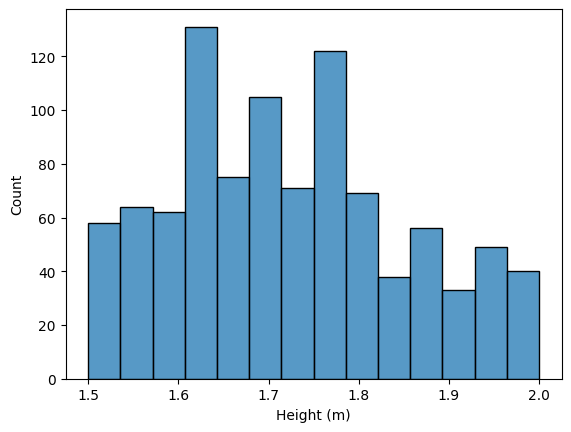

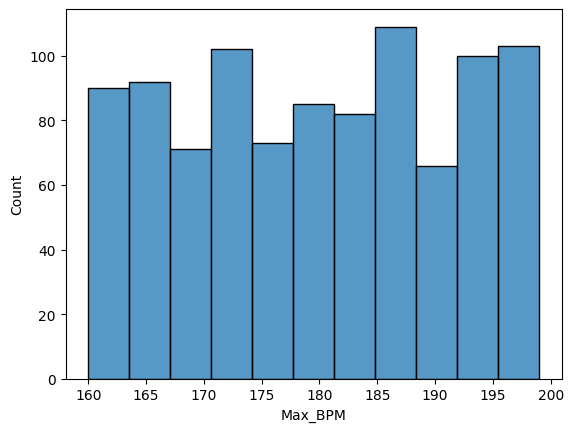

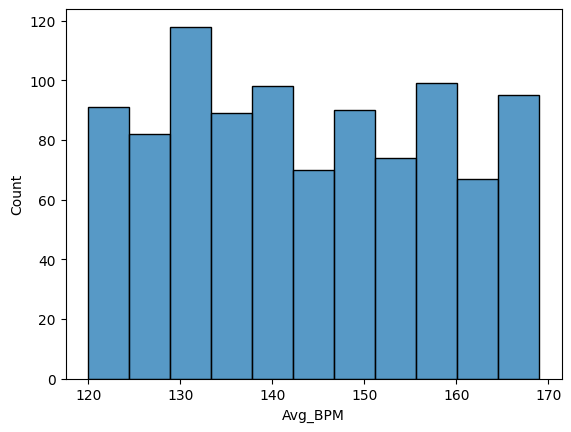

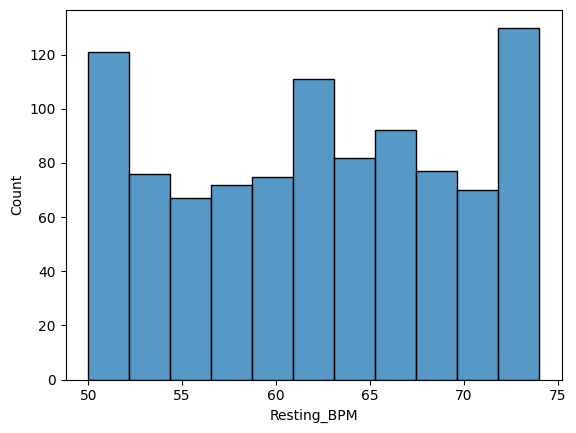

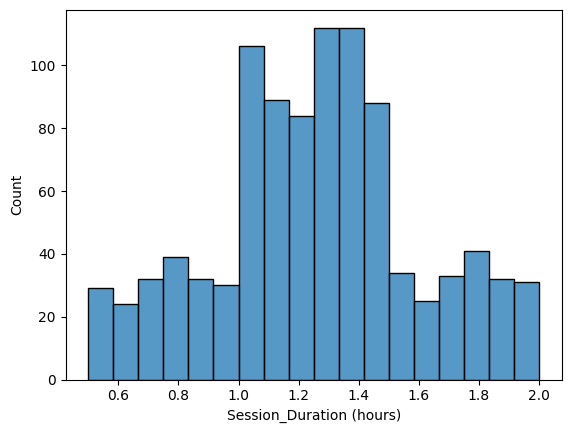

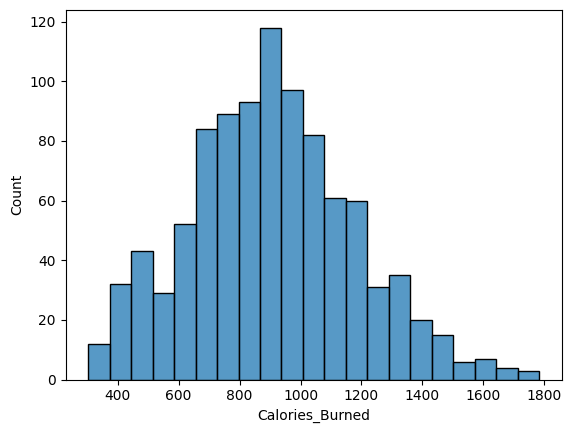

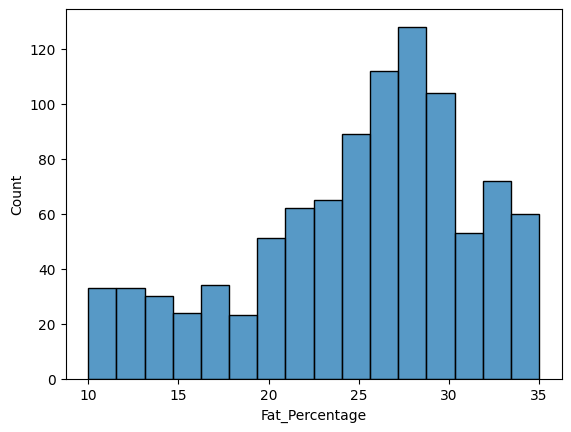

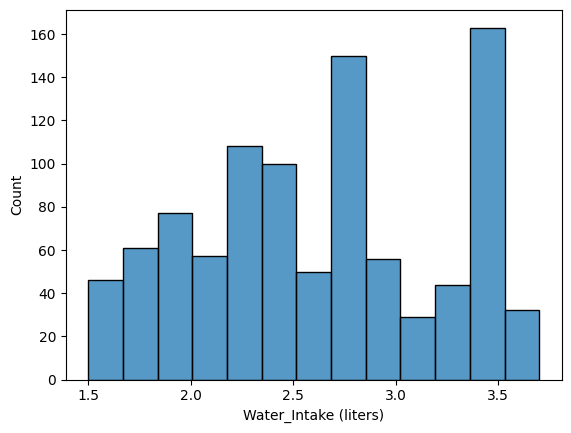

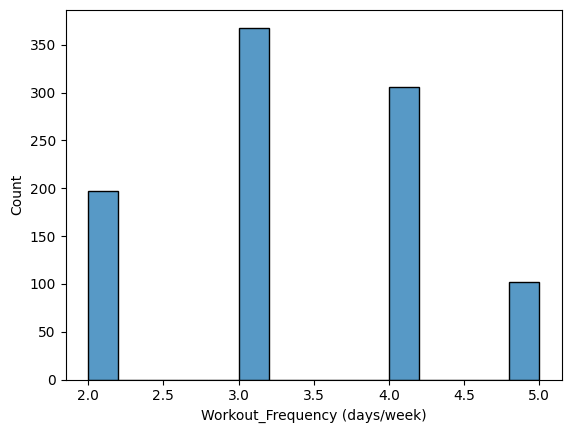

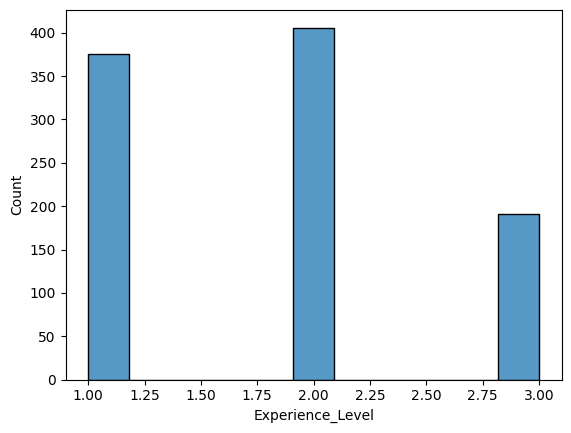

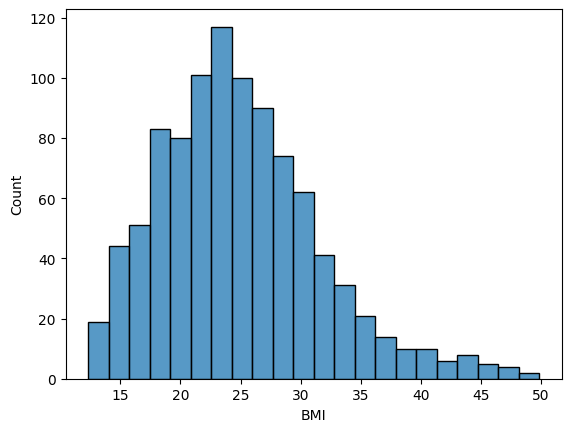

In [ ]:
#Histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
  sns.histplot(data=data,x=i)
  plt.show()

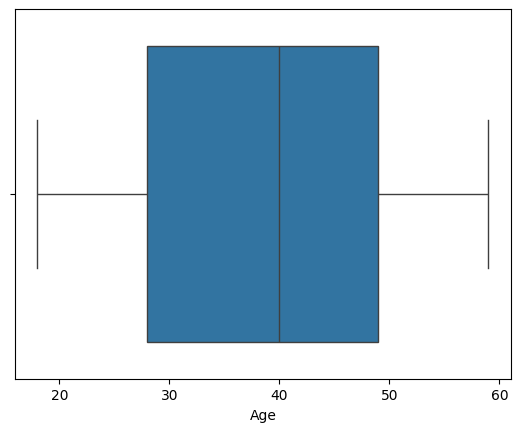

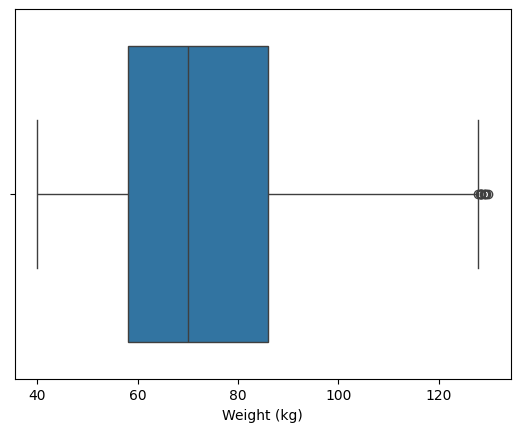

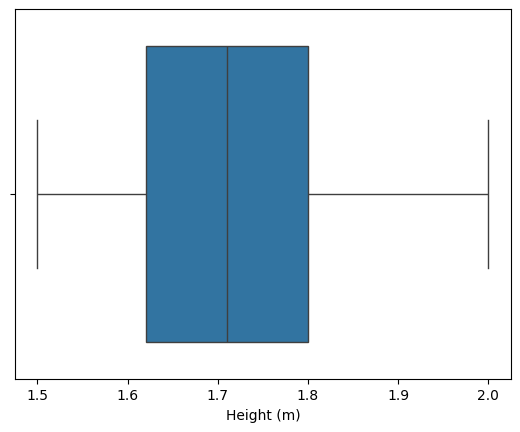

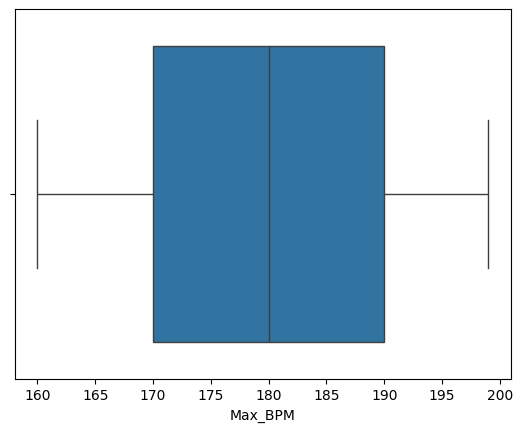

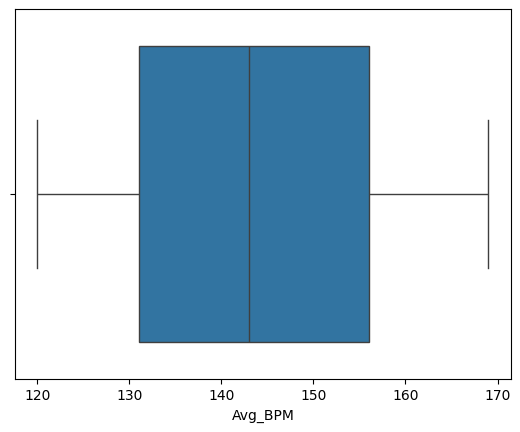

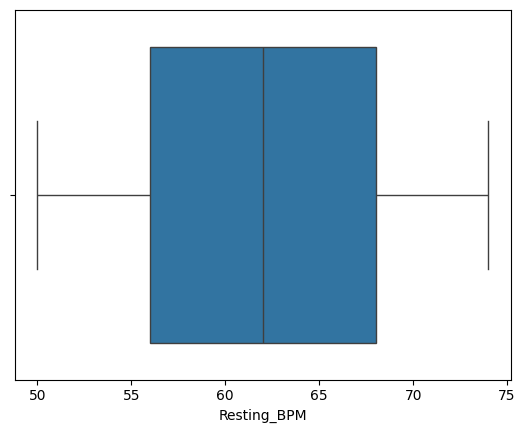

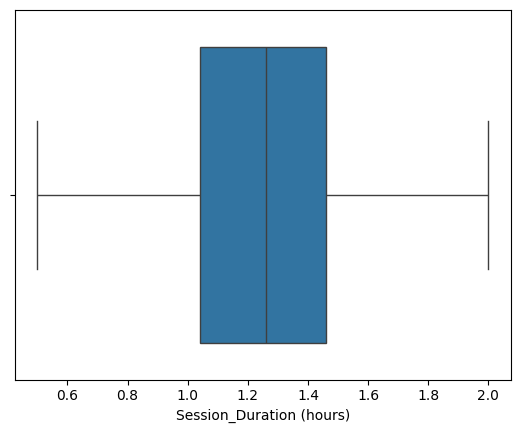

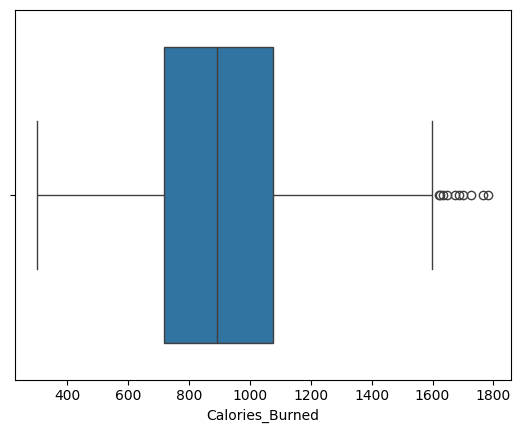

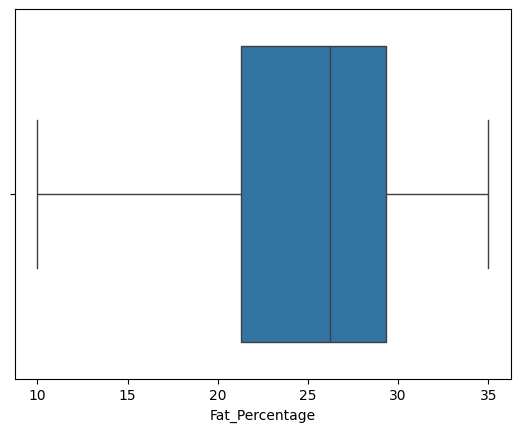

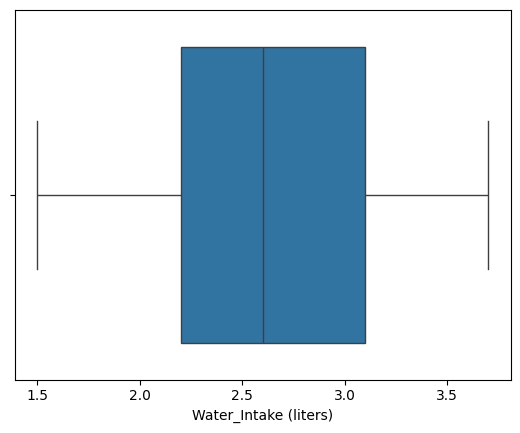

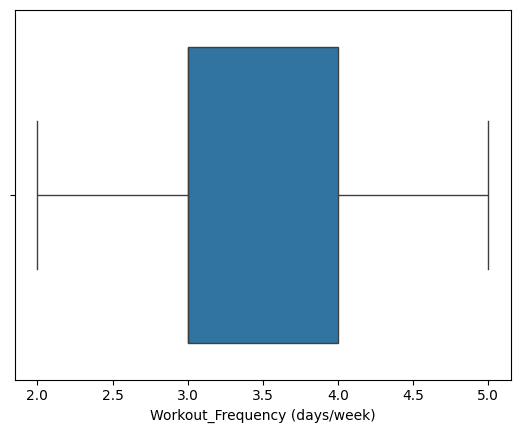

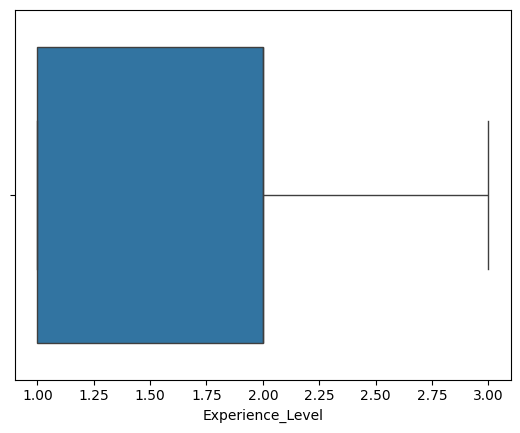

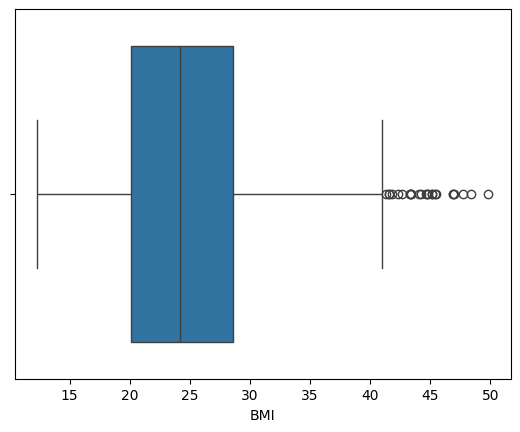

In [ ]:
#Boxplot to identify the outliers
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

In [ ]:
column_names = data.columns.tolist()
print("Column Names:", column_names)

Column Names: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


<Axes: >

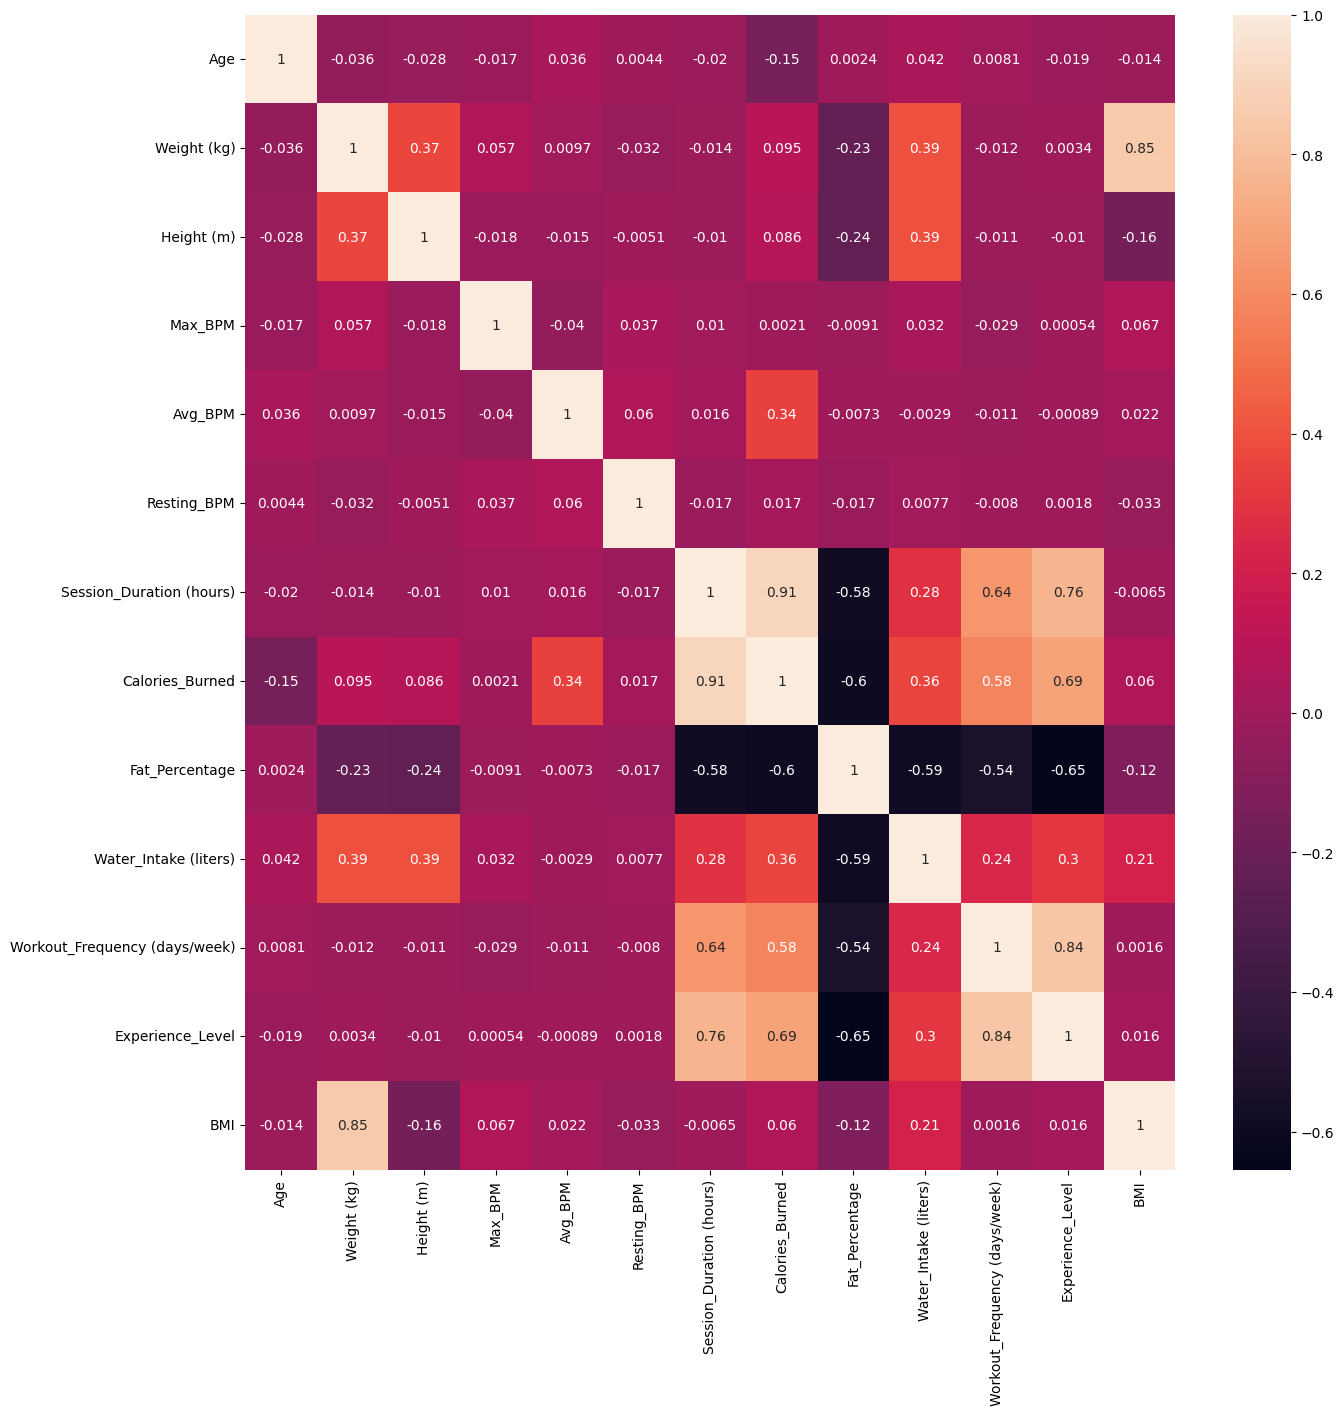

In [ ]:
# Correlation with heatmap to interpret the relation and multicolliniarity
s=data.select_dtypes(include="number").corr()

plt.figure(figsize=(15, 15))
sns.heatmap(s,annot=True)

In [ ]:
# Feature selection
features = ["Weight (kg)", "Workout_Type", "Session_Duration (hours)", "Max_BPM", "Avg_BPM", "Resting_BPM", "Age", "Gender", "Workout_Frequency (days/week)", "Experience_Level"]
label = "Calories_Burned"

In [ ]:
# Encode categorical variables (e.g., Gender, Workout_Type)
label_encoders = {}
for col in ["Gender", "Workout_Type"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Split features and target variable
X = data[features]
y = data[label]

Model Training

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

Key Hyperparameters to Tune:


*  **n_estimators**: Number of trees in the forest.





*   **max_depth**: Maximum depth of each tree (controls overfitting).
*   **min_samples_split**: Minimum number of samples required to split an internal node.


*   **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
*   **max_features**: Number of features to consider when looking for the best split.









In [ ]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best R2 Score for Random Forest:", grid_rf.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score for Random Forest: 0.9703251343785888


XGBoost
Key Hyperparameters to Tune:


*   **n_estimators**: Number of boosting rounds.

*   **max_depth**: Maximum depth of a tree.

*   **learning_rate**: Step size shrinkage to prevent overfitting.
*   **reg_alpha**: L1 regularization term.


*   **reg_lambda**: L2 regularization term.


*   **subsample**: Fraction of samples used for training each tree.

*   **colsample_bytree**: Fraction of features used for each tree.













In [ ]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [1, 1.5, 2]
}
xgb_model = XGBRegressor(random_state=42)
random_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, cv=5, n_iter=50, scoring="r2", verbose=2, n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", random_xgb.best_params_)
print("Best R2 Score for XGBoost:", random_xgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for XGBoost: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best R2 Score for XGBoost: 0.9954083514915707


AdaBoost
Key Hyperparameters to Tune:




*   **n_estimators**: Number of boosting iterations.

*   **learning_rate**: Controls the contribution of each weak learner.
*   **base_estimator**: The type of weak learner





In [ ]:
# Hyperparameter tuning for AdaBoost
ab_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "base_estimator": [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=3), LinearRegression()]
}
ab = AdaBoostRegressor(random_state=42)
grid_ab = GridSearchCV(estimator=ab, param_grid=ab_param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
grid_ab.fit(X_train, y_train)
print("Best Parameters for AdaBoost:", grid_ab.best_params_)
print("Best R2 Score for AdaBoost:", grid_ab.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for AdaBoost: {'base_estimator': LinearRegression(), 'learning_rate': 0.01, 'n_estimators': 50}
Best R2 Score for AdaBoost: 0.9777517164710308


In [ ]:
# Use tuned hyperparameters
models = {
    "Random Forest": RandomForestRegressor(
        random_state=42, **grid_rf.best_params_
    ),
    "XGBoost": XGBRegressor(
        random_state=42, **random_xgb.best_params_
    ),
    "AdaBoost": AdaBoostRegressor(
        **grid_ab.best_params_, random_state=42
    )
}

Model Evaluation

In [ ]:
# Evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        "Training R2": train_r2,
        "Test R2": test_r2,
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:\n")
print(results_df)


Model Evaluation Results:

               Training R2   Test R2        MAE       RMSE
Random Forest     0.995074  0.975062  32.700592  45.611707
XGBoost           0.999209  0.996996  12.140784  15.830834
AdaBoost          0.978675  0.980373  30.061138  40.464170


In [ ]:
# Save the best model based on test R2 score
best_model_name = results_df["Test R2"].idxmax()
best_model = models[best_model_name]
import joblib
joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
print(f"Best model ({best_model_name}) saved successfully.")

Best model (XGBoost) saved successfully.


Model Prediction

In [ ]:
# Predict on new data
def predict_calories(model, input_data):
    for col in ["Gender", "Workout_Type"]:
        le = label_encoders[col]
        input_data[col] = le.transform(input_data[col])
    return model.predict(input_data)

new_member = pd.DataFrame({
    "Weight (kg)": [70],
    "Workout_Type": ["Cardio"],
    "Session_Duration (hours)": [1],
    "Max_BPM": [180],
    "Avg_BPM": [140],
    "Resting_BPM": [70],
    "Age": [30],
    "Gender": ["Male"],
    "Workout_Frequency (days/week)": [5],
    "Experience_Level": [0]
})
predicted_calories = predict_calories(best_model, new_member)
print(f"Predicted Calories Burned: {predicted_calories[0]:.2f}")

Predicted Calories Burned: 773.03
